In [ ]:
pip install autocorrect

In [ ]:
pip install contractions

In [3]:
#libraries for data manipulation/cleaning
import pandas as pd
import json
import numpy as np

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#importing libraries for vectorization of the nominal features
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.preprocessing import LabelEncoder 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer #for lemmatization
from nltk.stem.snowball import SnowballStemmer #for stemming 
import nltk # for text processing
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import remove_stopwords
from gensim import corpora
from autocorrect import Speller
import contractions
import re
from nltk.corpus import stopwords
from nltk.corpus import wordnet

#Dimensionality reduction techniques
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD # this is for LSA 

# to determine how many topics to use
from sklearn.metrics import silhouette_score
from gensim.models import CoherenceModel

# word cloud libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [57]:
"""
import gzip
import shutil
with gzip.open('/content/drive/MyDrive/Colab Notebooks/Copy of Office_Products_5.json.gz', 'rb') as f_in:
    with open('/content/drive/MyDrive/Colab Notebooks/office_products2.json', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
"""

office_prods_orig = pd.read_json("/content/drive/MyDrive/Colab Notebooks/office_products2.json", lines = True)

# need to take a subsample of the dataset 
#office_prods = office_prods.sample(100000, weights='overall', random_state=0).reset_index(drop=True)
office_prods = office_prods_orig.sample(100000, weights='overall', random_state=0).reset_index(drop=True)

#office_prods = pd.read_json("/content/drive/MyDrive/Colab Notebooks/office_prods_label_only.json", lines = True)


In [ ]:
#office_prods = pd.DataFrame.from_dict(office_prods["reviewText"], orient="index")

#office_prods = pd.DataFrame.from_dict(office_prods["reviewText"])

['2nd', '3m', '3rd', '4x6', 'ability', 'able', 'absolute', 'absolutely', 'abuse', 'accept', 'acceptable', 'access', 'accidentally', 'account', 'accurate', 'action', 'actual', 'actually', 'adapter', 'add', 'added', 'addition', 'additional', 'address', 'adequate', 'adhesive', 'adjust', 'adjustable', 'admit', 'adorable', 'adult', 'advantage', 'afford', 'affordable', 'afraid', 'age', 'ago', 'agree', 'ahead', 'air', 'allow', 'alternative', 'amazing', 'angle', 'annoying', 'answer', 'apart', 'apparently', 'appear', 'appearance', 'apple', 'application', 'applied', 'apply', 'appreciate', 'appropriate', 'area', 'arm', 'arrive', 'art', 'artist', 'aside', 'ask', 'assemble', 'assembly', 'assortment', 'assume', 'attach', 'attached', 'attention', 'attractive', 'auto', 'automatic', 'automatically', 'available', 'average', 'avoid', 'aware', 'away', 'awesome', 'awful', 'awhile', 'awkward', 'b', 'baby', 'background', 'backing', 'backup', 'bad', 'badge', 'bag', 'balance', 'ball', 'band', 'bank', 'bar', 'b

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [58]:
# text processing from Ayesha

def clean_words(df, misc_words):
    df = df[df['reviewText'].notnull()]
    df['reviewText'].dropna(inplace=True)
    #  apply lowercase
    df['reviewText'] = df['reviewText'].str.lower()

    # Removing numbers
    df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'[0-9]', '', x))

    # Contractions
    df['no_contract'] = df['reviewText'].apply(lambda x: [contractions.fix(word) for word in x.split()])
    df['reviewText'] = [' '.join(map(str, l)) for l in df['no_contract']]
    df.drop(columns = 'no_contract', inplace = True)

    #  Remove the recurring unnecessary words like love, good, great seen in later analysis
    stop_words = stopwords.words('english')
    df['reviewText'] = df['reviewText'].apply(lambda x: [word for word in x.split() if word not in stop_words])
    df['reviewText'] = df['reviewText'].apply(lambda x: [word for word in x if word not in misc_words])

    
    #  Using only english words and replacing unknown words with 'UNK'
    #english_language = set(nltk.corpus.words.words())
    #df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join(w if w in english_language or not w.isalpha() else "UNK" for w in nltk.wordpunct_tokenize(x)))
    
    # Lemmatizing
    df['reviewText'] = df['reviewText'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

    # Stemming data
    #stemmer = SnowballStemmer('english')
    #df['reviewText'] = df['reviewText'].apply(lambda x: [stemmer.stem(word) for word in x])

    #  Remove the recurring unnecessary words like love, good, great seen in later analysis
    df['reviewText'] = df['reviewText'].apply(lambda x: [word.lower() for word in x if word.lower() not in stop_words])
    df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([word for word in x if word not in misc_words]))

    #  tokenize the text and remove punctuation
    tokenizer = RegexpTokenizer(r'[A-Za-z]+')
    df['no_punctuation'] = df['reviewText'].apply(lambda x: tokenizer.tokenize(x))
    df['reviewText'] = [' '.join(map(str, l)) for l in df['no_punctuation']]
                                              
    
    return df

#office_prods = office_prods_orig.sample(50000, weights='overall', random_state=0).reset_index(drop=True)
# words that are not helpful

#misc_words = ['love', 'great', 'good', 'can', 'would', 'like', 'work', 'recommend', 'much', 'better', 'highly', 'a', 'product', 'perfect', 'nice', 'excellent']
misc_words = []
office_prods = clean_words(office_prods, misc_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [30]:
print(office_prods['reviewText'].head)

<bound method NDFrame.head of 0        give star performance time light button little...
1        larger staple arc notebook system great taking...
2        shredder tremendous improvement several tried ...
3                                                     love
4        work great getting mark board quickly easily h...
                               ...                        
99995                                      better expected
99996    pen favorite find ink last forever also comfor...
99997    hp ink cartridge notoriously overpriced photos...
99998    took awhile find these know call them several ...
99999    perfect wanted used for hold books pages perfe...
Name: reviewText, Length: 99965, dtype: object>


In [ ]:
# dropping NA reviews

reviews1 = office_prods_orig['reviewText']
reviews1 = reviews1.dropna()
reviews1.head(), len(reviews1)

print(reviews1)

reviews1 = pd.DataFrame(reviews1) #coercing reviews into a new data frame

reviews1.columns = ['text']
reviews1.head()

lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')  

reviews1 = map(lambda x: x.lower(), reviews1) #converting everything to lower case
reviews1 = map(lambda x: stemmer.stem(x), reviews1) #stemming
reviews1 = pd.DataFrame(reviews1) #coercing reviews into a new data frame

reviews1.columns = ['text']
reviews1.head()

0         kids like story BUT while i really wanted a bo...
1         Bought this used and it came in great conditio...
2         Every story and book about Corduroy is Fantast...
3         I purchased this book for my first grade class...
4         Having spent numerous years in an elementary s...
                                ...                        
800352                Delivered on time and is as expected.
800353                                        worked great.
800354    I used to score free UPS 4x6 labels.  The blac...
800355                                                great
800356    Struggled finding a sharpener and they didn't ...
Name: reviewText, Length: 800144, dtype: object


,text
0,text


In [ ]:
reviews_list = reviews1["text"].tolist()

#min_df = 1000/len(office_prods)
#l_enc = LabelEncoder()
#cv = CountVectorizer(stop_words = 'english')
#tfidf = TfidfVectorizer(min_df = min_df , stop_words = 'english', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

#word_matrix = tfidf.fit_transform(reviews['text'])

# source to take out words that don't appear in the dictionary
# https://stackoverflow.com/questions/41290028/removing-non-english-words-from-text-using-python

#test_sample = reviews[0:10]

nltk.download('words')
words = set(nltk.corpus.words.words())

# new list without words that don't appear in the english dictionary
reviews = []
for i in reviews_list:
  temp = " ".join(w for w in nltk.wordpunct_tokenize(i) \
         if w.lower() in words or not w.isalpha())
  reviews.append(temp)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [59]:
# tried with count vectorizer
#cv = CountVectorizer(min_df = 5, stop_words = "english", token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
#bow = cv.fit_transform(reviews)

reviews = office_prods['reviewText']

# now with tfidf
tfidf = TfidfVectorizer(min_df = 1000, stop_words = "english", token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
bow = tfidf.fit_transform(reviews)

print(bow.shape)

(99965, 274)


In [ ]:
print(bow)

In [60]:
svd = TruncatedSVD(n_components=7)

lsa = svd.fit_transform(bow)

topic_names = ['Topic %d'%(i) for i in range(1, 8)]

topic_encoded_df = pd.DataFrame(lsa, columns = topic_names)
topic_encoded_df["body"] = reviews

In [ ]:
#display(topic_encoded_df[["body", "topic_1", "topic_2", "topic_3", "topic_4"]])

In [61]:
f_names = tfidf.get_feature_names_out()
print(f_names)

['able' 'actually' 'add' 'advertised' 'amazon' 'arrived' 'away' 'awesome'
 'bad' 'beautiful' 'best' 'better' 'big' 'binder' 'bit' 'black' 'blue'
 'board' 'book' 'bought' 'box' 'brand' 'bright' 'brother' 'business' 'buy'
 'buying' 'came' 'canon' 'card' 'cards' 'cartridge' 'cartridges' 'case'
 'change' 'cheap' 'cheaper' 'class' 'clean' 'clear' 'color' 'colored'
 'colors' 'come' 'comfortable' 'computer' 'cost' 'couple' 'cover' 'cut'
 'cute' 'day' 'deal' 'definitely' 'described' 'design' 'desk' 'different'
 'dry' 'durable' 'easier' 'easily' 'easy' 'end' 'envelope' 'especially'
 'exactly' 'excellent' 'expected' 'expensive' 'extra' 'fact' 'far' 'fast'
 'favorite' 'feature' 'feel' 'file' 'fine' 'fit' 'fountain' 'free' 'fun'
 'gel' 'getting' 'gift' 'going' 'good' 'got' 'great' 'half' 'hand' 'handy'
 'happy' 'hard' 'heavy' 'help' 'high' 'highly' 'hold' 'home' 'house' 'hp'
 'ink' 'inside' 'instead' 'issue' 'item' 'job' 'kid' 'kind' 'know' 'label'
 'large' 'larger' 'le' 'lead' 'let' 'life' 'light

In [69]:
encoding_matrix = pd.DataFrame(svd.components_, index = topic_names, columns = f_names).T.abs()

misc_words = ['love', 'great', 'good', 'like', 'work', 'recommend', 'better', 'highly', 'product', 'perfect', 'nice', 'excellent', 'use']
encoding_matrix = encoding_matrix.drop(misc_words, axis = 0)

print(encoding_matrix)

             Topic 1   Topic 2   Topic 3  ...   Topic 5   Topic 6   Topic 7
able        0.014539  0.009099  0.022488  ...  0.016315  0.004246  0.011099
actually    0.012614  0.009077  0.019347  ...  0.014410  0.001569  0.002705
add         0.009209  0.005351  0.013341  ...  0.009441  0.001038  0.006780
advertised  0.014321  0.005254  0.007326  ...  0.001412  0.027390  0.008098
amazon      0.025036  0.015012  0.025690  ...  0.025549  0.008917  0.009685
...              ...       ...       ...  ...       ...       ...       ...
writes      0.012612  0.008619  0.022338  ...  0.012385  0.026913  0.051277
writing     0.029226  0.018705  0.054655  ...  0.029966  0.043742  0.077842
x           0.011592  0.009046  0.016665  ...  0.019058  0.004519  0.016761
year        0.032803  0.021803  0.049896  ...  0.029620  0.007309  0.024070
years       0.011968  0.008320  0.016998  ...  0.012717  0.001612  0.000805

[261 rows x 7 columns]


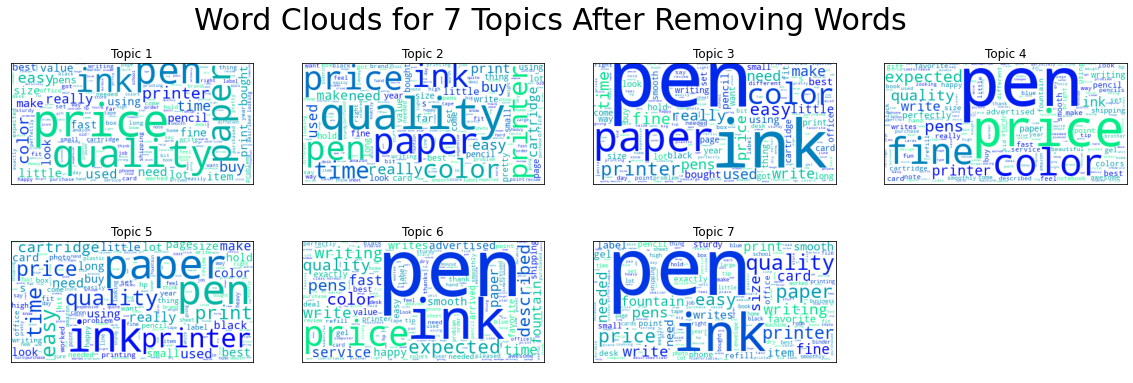

In [70]:
# plotting all 20 topic word clouds in a grid

fig, axs = plt.subplots(2, 4)
fig.set_size_inches(20, 6)
fig.suptitle('Word Clouds for 7 Topics After Removing Words', fontsize = 30)
axs[-1, -1].axis('off')

k = 0
for i in range(0, 2):
  for j in range(0, 4):
    tmp = encoding_matrix.sort_values(topic_names[k], ascending = False)
    words = WordCloud(colormap = 'winter', background_color = 'white').generate_from_frequencies(tmp[topic_names[k]])
    axs[i, j].imshow(words)
    axs[i, j].xaxis.set_visible(False)
    axs[i, j].yaxis.set_visible(False)
    axs[i, j].set_title(topic_names[k])
    if k == 6:
      break
    else:
      k += 1

plt.savefig('word_clouds_after_removing.png')
plt.show()